In [1]:
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors

import scanpy as sc
import squidpy as sq
from anndata import AnnData
import pandas as pd
import PIL
from PIL import Image
import numpy as np

import json

import warnings

warnings.filterwarnings('ignore')

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")


/nethome/anastasiya.kazachenk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.23.4 scipy==1.11.1 pandas==2.2.2 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.11.4 pynndescent==0.5.12
squidpy==1.4.1


In [2]:
full = pd.read_csv("/nethome/anastasiya.kazachenk/Projects/Ultivue/Immune_Panel_Cell_Objects_Data/modified/modified_USL-2023-53535_2.csv")
full

,center_x,center_y,object,marker_tissuetype,cell_phenotype,MECA79,IL7R,CD56,CD163,CD20,...,mean_intensity_il-7r,mean_intensity_cd56,mean_intensity_cd163,mean_intensity_cd20,mean_intensity_cd3,mean_intensity_cd28,mean_intensity_dapi1,SOX10,image_id,CellID
0,2801,25078,71,tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10+,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,921.7333333,124.9931818,204.7477273,111.7666667,116.1583333,142.825,139.4871212,SOX10+,USL-2023-53535_2,Cell_1
1,2894,25392,32177,non tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,1525.242268,113.121134,702.4123711,245.7963918,323.9304124,221.5773196,2635.657216,SOX10-,USL-2023-53535_2,Cell_2
2,2897,25302,22320,non tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,2691.084444,159.2177778,520.9244444,374.4222222,571.5822222,201.8488889,1824.568889,SOX10-,USL-2023-53535_2,Cell_3
3,2907,25293,20487,non tumor,MECA79-IL7R+CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R+,CD56-,CD163-,CD20-,...,8499.183406,175.7117904,543.1441048,461.3144105,515.6375546,286.2882096,1825.930131,SOX10-,USL-2023-53535_2,Cell_4
4,2915,25342,26876,non tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,2380.308779,215.641776,1061.048436,455.4490414,490.8789102,274.6367306,5725.788093,SOX10-,USL-2023-53535_2,Cell_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91284,22448,3918,33625,tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,922.7587302,94.92698413,899.247619,209.4952381,827.9142857,203.9428571,1974.733333,SOX10-,USL-2023-53535_2,Cell_91285
91285,22456,3832,17919,tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,1931.915094,239.7688679,2755.004717,266.1462264,5753.150943,746.7735849,2608.160377,SOX10-,USL-2023-53535_2,Cell_91286
91286,22462,3771,9772,non tumor,MECA79-IL7R-CD56-CD163-CD20-CD3+CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,1689.387387,138.9504505,1316.198198,223.1486486,2119.441441,481.7567568,3042.927928,SOX10-,USL-2023-53535_2,Cell_91287
91287,22493,3746,5843,non tumor,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,MECA79-,IL7R-,CD56-,CD163-,CD20-,...,1608.064286,140.35,3615.317857,246.3178571,683.2321429,293.0035714,3252.603571,SOX10-,USL-2023-53535_2,Cell_91288


In [3]:
features_df = full.iloc[:, 12:20]
features = features_df.to_numpy()
features

array([['4124.424242', '213.5083333', '921.7333333', ..., '111.7666667',
        '116.1583333', '142.825'],
       ['442.1005155', '329.7190722', '1525.242268', ..., '245.7963918',
        '323.9304124', '221.5773196'],
       ['624.2088889', '415.8577778', '2691.084444', ..., '374.4222222',
        '571.5822222', '201.8488889'],
       ...,
       ['543.5405405', '404.4279279', '1689.387387', ..., '223.1486486',
        '2119.441441', '481.7567568'],
       ['1061.146429', '473.7142857', '1608.064286', ..., '246.3178571',
        '683.2321429', '293.0035714'],
       ['690.0882852', '455.6859083', '1950.867572', ..., '252.2852292',
        '4595.597623', '591.7198642']], dtype=object)

In [4]:
coordinates = full.iloc[:, 0:2]
coordinates = coordinates.to_numpy()
## Invert the two columns
coordinates = coordinates[:, [0, 1]]
coordinates

array([[ 2801, 25078],
       [ 2894, 25392],
       [ 2897, 25302],
       ...,
       [22462,  3771],
       [22493,  3746],
       [22499,  3730]])

In [5]:
#### KNN from sklearn

knn = NearestNeighbors(n_neighbors=11, p=2)
knn.fit(coordinates)

#knn.kneighbors(coordinates[24620].reshape(1,-1))

NearestNeighbors(n_neighbors=11)

In [6]:
distances, indices = knn.kneighbors(coordinates)

results = []

for i, (dist, ind) in enumerate(zip(distances, indices)):
    for d, idx in zip(dist[1:], ind[1:]):
        results.append({
            'seed': coordinates[i],
            'neighbor': coordinates[idx],
            'distance': d
        })
        
df = pd.DataFrame(results)

df.head(15)

,seed,neighbor,distance
0,"[2801, 25078]","[2965, 25164]",185.180993
1,"[2801, 25078]","[3001, 25108]",202.237484
2,"[2801, 25078]","[3001, 25136]",208.240246
3,"[2801, 25078]","[2921, 25256]",214.671843
4,"[2801, 25078]","[2985, 25200]",220.771375
5,"[2801, 25078]","[3030, 25093]",229.490741
6,"[2801, 25078]","[3012, 25172]",230.991342
7,"[2801, 25078]","[3024, 25140]",231.458420
8,"[2801, 25078]","[3006, 25195]",236.038133
9,"[2801, 25078]","[2907, 25293]",239.710242


In [7]:
# Create AnnData object

adata = AnnData(features, obsm={"spatial": coordinates})
adata.obs["Tissue_type"] = full["marker_tissuetype"].to_numpy()
adata.obs["MECA79"] = full["MECA79"].to_numpy()
adata.obs["IL7R"] = full["IL7R"].to_numpy()
adata.obs["CD56"] = full["CD56"].to_numpy()
adata.obs["CD163"] = full["CD163"].to_numpy()
adata.obs["CD20"] = full["CD20"].to_numpy()
adata.obs["CD3"] = full["CD3"].to_numpy()
adata.obs["CD28"] = full["CD28"].to_numpy()
adata.obs["SOX10"] = full["SOX10"].to_numpy()
adata.obs["Cell_phenotype"] = full["cell_phenotype"].to_numpy()
adata.obs["Cell_id"] = full["CellID"].to_numpy()
adata.obs_names = full["CellID"].to_numpy()

In [8]:
adata.obs

,Tissue_type,MECA79,IL7R,CD56,CD163,CD20,CD3,CD28,SOX10,Cell_phenotype,Cell_id
Cell_1,tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10+,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10+,Cell_1
Cell_2,non tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_2
Cell_3,non tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_3
Cell_4,non tumor,MECA79-,IL7R+,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R+CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_4
Cell_5,non tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_5
...,...,...,...,...,...,...,...,...,...,...,...
Cell_91285,tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_91285
Cell_91286,tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_91286
Cell_91287,non tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3+,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3+CD28-SOX10-,Cell_91287
Cell_91288,non tumor,MECA79-,IL7R-,CD56-,CD163-,CD20-,CD3-,CD28-,SOX10-,MECA79-IL7R-CD56-CD163-CD20-CD3-CD28-SOX10-,Cell_91288


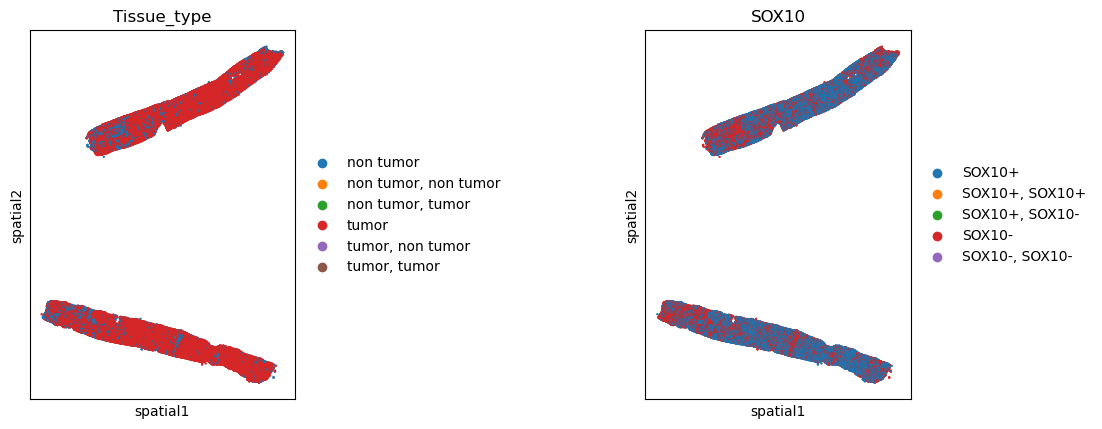

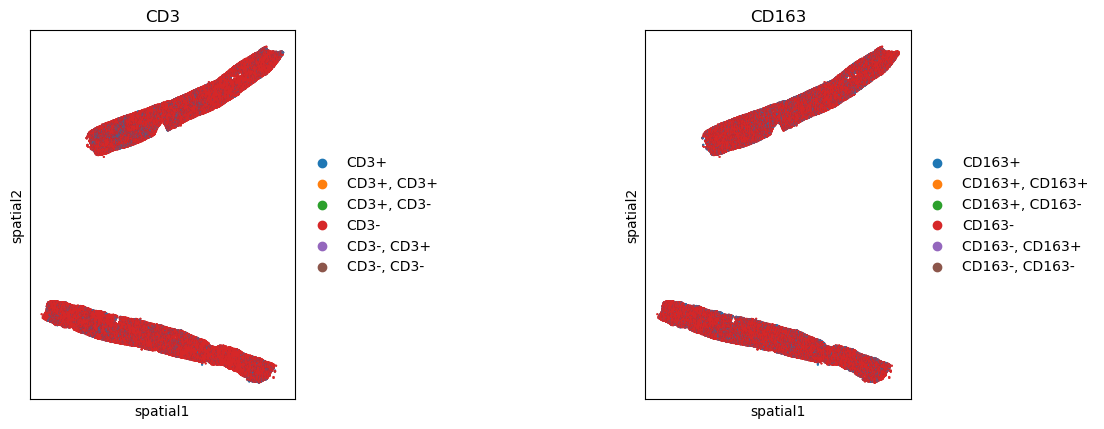

In [9]:
# Plot AnnData

sq.pl.spatial_scatter(adata, shape=None, size=1,color=["Tissue_type","SOX10"])
sq.pl.spatial_scatter(adata, shape=None, size=1,color=["CD3","CD163"])

In [10]:
# 10 nearest neighbors using squidpy

sq.gr.spatial_neighbors(adata, coord_type="generic", n_neighs = 10)

#cell_ids = adata.obs_names

#columns = ['Neighbor1','Neighbor2','Neighbor3','Neighbor4','Neighbor5',
#           'Neighbor6','Neighbor7','Neighbor8','Neighbor9','Neighbor10','Seed']
#data = []

#for cell in cell_ids:
#    cell_index = np.where(adata.obs_names == cell)[0][0]
#    neighbor_indices = adata.obsp['spatial_connectivities'][cell_index].nonzero()[1]
#    indices_to_plot = np.append(neighbor_indices, cell_index)
#    row_dict = dict(zip(columns,indices_to_plot))
#    data.append(row_dict)

#data_df = pd.DataFrame(data)
#data_df

In [11]:
# checking max and min coords for ploting

spatial_coords = adata.obsm['spatial']
max_x = spatial_coords[:, 0].max()
max_y = spatial_coords[:, 1].max()
min_x = spatial_coords[:, 0].min()
min_y = spatial_coords[:, 1].min()
print(max_x)
print(max_y)
print(min_x)
print(min_y)

22499
30657
2801
3260


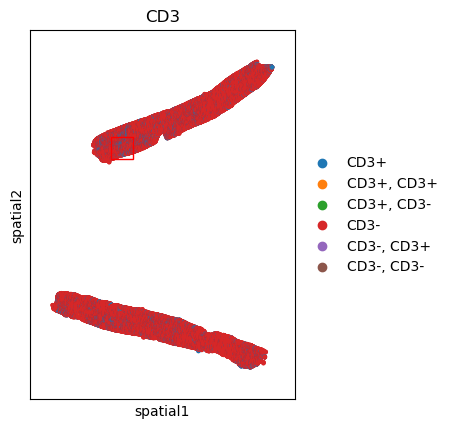

In [14]:
## Graph plot with area highlight

fig, ax = plt.subplots()

sq.pl.spatial_scatter(
    adata,
    color="CD3",
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=.5,
    size=20,
    ax=ax
)

xmin, ymin, xmax, ymax = 8000, 10000,10000,12000

rect = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)

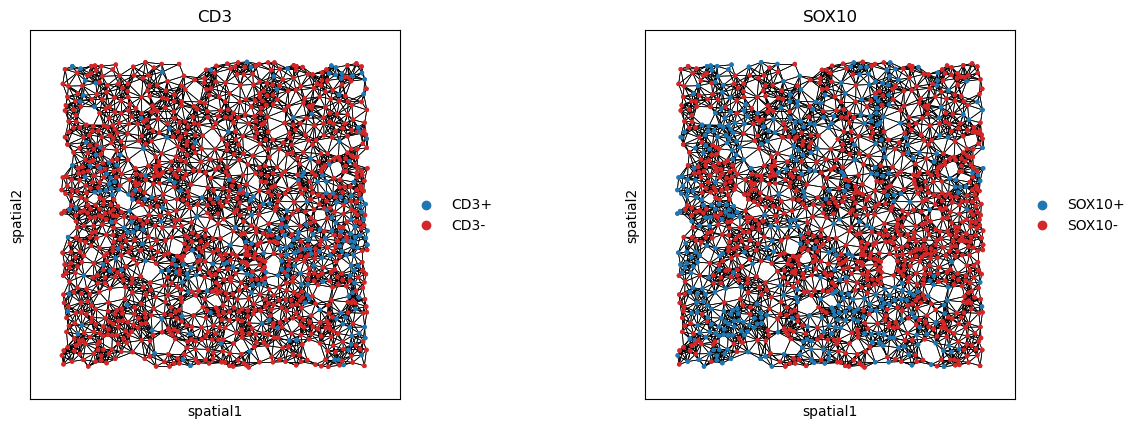

In [16]:
# Graph plot of the area itself

xmin, ymin, xmax, ymax = 8000, 10000,9000,11000

sq.pl.spatial_scatter(
    adata,
    color=["CD3","SOX10"],
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=.5,
    size=20,
    crop_coord=(xmin, ymin, xmax, ymax)
)

#sq.pl.spatial_scatter(
#    adata,
#    color="SOX10",
#    connectivity_key="spatial_connectivities",
#    edges_color="black",
#    shape=None,
#    edges_width=.5,
#    size=20,
#    crop_coord=(xmin, ymin, xmax, ymax)
#)

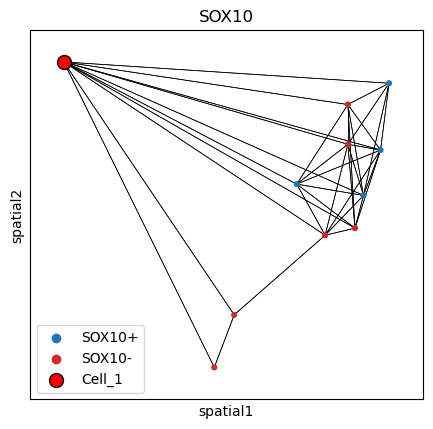

[ 3  5  8 13 16 17 19 21 25 26  0]


In [17]:
# Graph plot for an individual Seed Cell

cell_index = np.where(adata.obs_names == "Cell_1")[0][0]
neighbor_indices = adata.obsp['spatial_connectivities'][cell_index].nonzero()[1]
indices_to_plot = np.append(neighbor_indices, cell_index)

adata_subset = adata[indices_to_plot, : ].copy()

fig, ax = plt.subplots()

sq.pl.spatial_scatter(
    adata_subset,
    color=["SOX10"],
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=.5,
    size=40,
    ax=ax
)


cell_1_coords = adata_subset.obsm['spatial'][np.where(adata_subset.obs_names == "Cell_1")[0][0]]
ax.scatter(cell_1_coords[0],cell_1_coords[1],color='red',s=100,edgecolor='black',label='Cell_1')

plt.legend()
plt.show()

print(indices_to_plot)